# นายธนินท์ ตั้งกอบลาภ | 660710714

# **Import library and Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("spam.csv", encoding = "latin1")

In [5]:
df.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


พิจารณาลบคอลัมน์ Unnamed 2, 3, 4 เนื่องจากที่จำนวนข้อมูลที่เป็น **NaN** เยอะเกินไป (ประมาณ 99%)

In [14]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df.drop(columns=columns_to_drop, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# **EDA - Exploring Data Analysis**
ในการทดลองครั้งนี้ได้พิจารณาเลือก **SMS Spam Collection Dataset** และทำกระบวนการต่าง ๆ เพื่อเป็นการสำรวจข้อมูลภายใน Dataset โดยทำข้อมูลทางสถิติจากหลายส่วนดังนี้


*   จำนวนข้อมูลของคลาส **Spam / ham**
*   จำนวน **URL** ที่แสดงในชุดข้อมูล (เปรียบเทียบระหว่าง Spam / Ham)
*   จำนวน **Phone number** ที่แสดงในชุดข้อมูล
*   จำนวนหมายเลข (ที่ไม่ใช่ Phone number)





# Class Imbalance Check
เพื่อเป็นการตรวจสอบความสมดุลระหว่างทั้งสองคลาส (Binary Classification) เป้าหมายเพื่อตรวจสอบและหาว่าคลาสใดเป็น


*   **Majority Class** (คลาสส่วนใหญ่): คลาสที่มีจำนวนข้อมูลมากกว่า
*   **Minority Class** (คลาสส่วนน้อย): คลาสที่มีจำนวนข้อมูลน้อยกว่า







v1
ham     4825
spam     747
Name: count, dtype: int64


<Axes: xlabel='v1'>

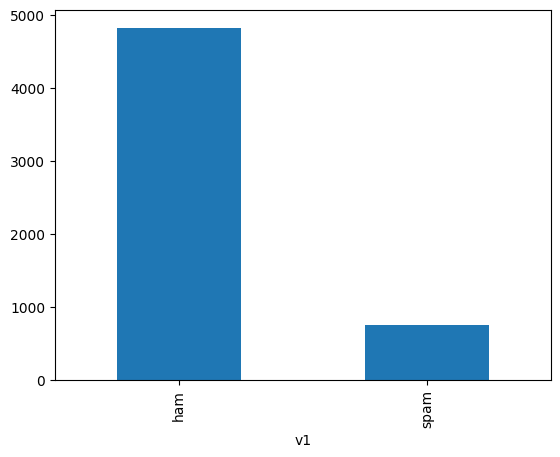

In [22]:
print(df['v1'].value_counts())
df['v1'].value_counts().plot(kind='bar')

**สรุปได้ว่า** จากข้อมูลจำนวนแถวทั้งหมด 5572 แถว มีจำนวนคลาสดังนี้


*   **Majority Class** (คลาสส่วนใหญ่): **ham** 4825 แถว
*   **Minority Class** (คลาสส่วนน้อย): **spam** 747 แถว



# **Check how many URL occur in dataset.**

Define transform function for change format in dataset.

In [23]:
import re
import string

def remove_punctuation(text) :
  punctuation_free = "".join([i for i in text if i not in string.punctuation])
  return punctuation_free

def remove_url(text) :
  url_free = re.sub(r'https?://[^\s]+|www\.[^\s]+|\b[A-Za-z0-9.-]+\.[A-Za-z]{2,}(?:/\S*)?\b', '[URL]', text)
  return url_free

def remove_phone_number(text) :
  phone_number_free = re.sub(r'(?<!\d)(0\d{9,10})', r'[PHONE_NUMBER]', text)
  return phone_number_free

def remove_number(text):
  number_free = re.sub(r'\d+', '', text)
  return number_free

def preprocess_text(text) :
  text = text.lower()
  text = remove_phone_number(text)
  text = remove_url(text)
  text = remove_punctuation(text)
  text = remove_number(text)
  return text

Apply with data.

In [24]:
data = df.copy()

In [28]:
data['v2'] = data['v2'].apply(preprocess_text)

In [47]:
data['url_count'] = data['v2'].str.count('URL')

Plot

v1
ham     540
spam    170
Name: url_count, dtype: int64


<Axes: xlabel='v1'>

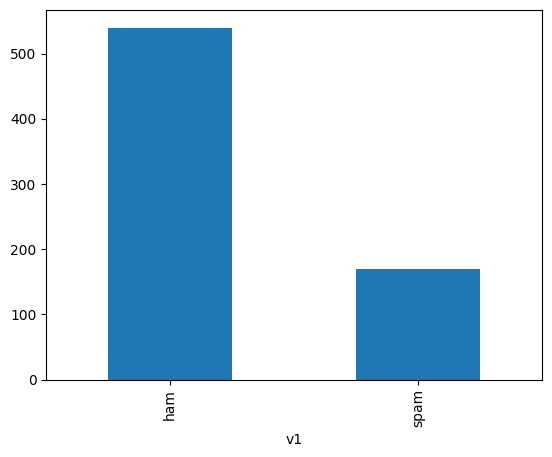

In [42]:
url_count_by_class = data.groupby('v1')['url_count'].sum()
print(url_count_by_class)
url_count_by_class.plot(kind='bar')

In [43]:
total_rows_by_class = data['v1'].value_counts()
rows_with_urls_by_class = data[data['url_count'] > 0].groupby('v1').size()
rows_without_urls_by_class = data[data['url_count'] == 0].groupby('v1').size()

print("\n--- Comparison of URL presence by class ---")
print("Total rows by class:")
print(total_rows_by_class)
print("\nRows with URLs by class:")
print(rows_with_urls_by_class)
print("\nRows without URLs by class:")
print(rows_without_urls_by_class)


--- Comparison of URL presence by class ---
Total rows by class:
v1
ham     4825
spam     747
Name: count, dtype: int64

Rows with URLs by class:
v1
ham     368
spam    155
dtype: int64

Rows without URLs by class:
v1
ham     4457
spam     592
dtype: int64


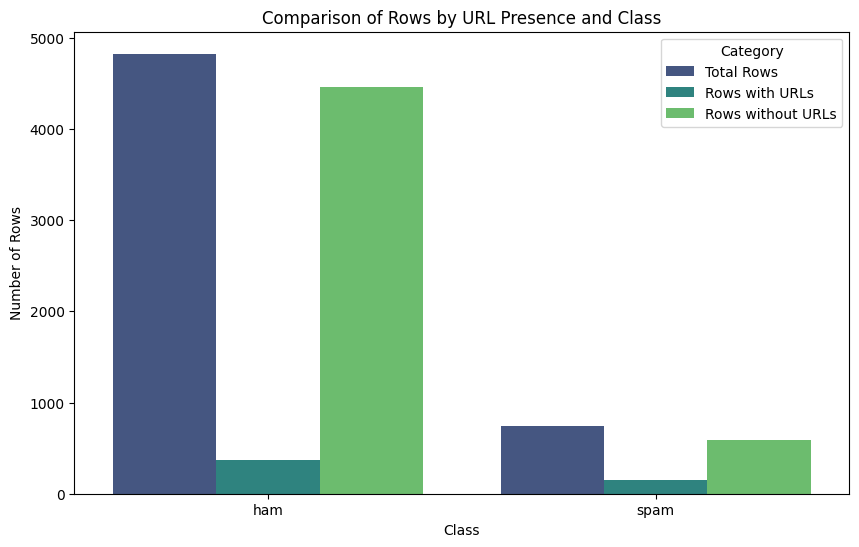

In [44]:
plot_data = pd.DataFrame({
    'Total Rows': total_rows_by_class,
    'Rows with URLs': rows_with_urls_by_class,
    'Rows without URLs': rows_without_urls_by_class
})

plot_data = plot_data.fillna(0)

plot_data_melted = plot_data.reset_index().melt(id_vars='v1', var_name='Category', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='v1', y='Count', hue='Category', data=plot_data_melted, palette='viridis')
plt.title('Comparison of Rows by URL Presence and Class')
plt.xlabel('Class')
plt.ylabel('Number of Rows')
plt.legend(title='Category')
plt.show()

**สรุปได้ว่า** จาก Bar plot ของข้อมูลที่แสดงออกมา แสดงให้เห็นว่า URL มักแสดงออกมาใน ham class อย่างเห็นได้ชัด และจำนวนของ URL ที่แสดงออกมาจากข้อมูลในแต่ละคลาส โดยพิจารณามีความต่างกันประมาณ


*   Ham class : **มี URL ~9%**


*   Spam class : **มี URL ~40%**

จากข้อมูลสรุปจะเห็นได้ว่าจำนวน URL นั้นมีผลต่อการพิจารณาผลลัพธ์ของคลาส Spam


In [56]:
data['phone_count'] = data['v2'].str.count('[PHONE_NUMBER]')

In [60]:
total_rows_by_class = data['v1'].value_counts()
rows_with_phone_by_class = data[data['phone_count'] > 0].groupby('v1').size()
rows_without_phone_by_class = data[data['phone_count'] == 0].groupby('v1').size()

print("\n--- Comparison of URL presence by class ---")
print("Total rows by class:")
print(total_rows_by_class)
print("\nRows with Phone number by class:")
print(rows_with_phone_by_class)
print("\nRows without Phone number by class:")
print(rows_without_phone_by_class)


--- Comparison of URL presence by class ---
Total rows by class:
v1
ham     4825
spam     747
Name: count, dtype: int64

Rows with Phone number by class:
v1
ham     369
spam    508
dtype: int64

Rows without Phone number by class:
v1
ham     4456
spam     239
dtype: int64


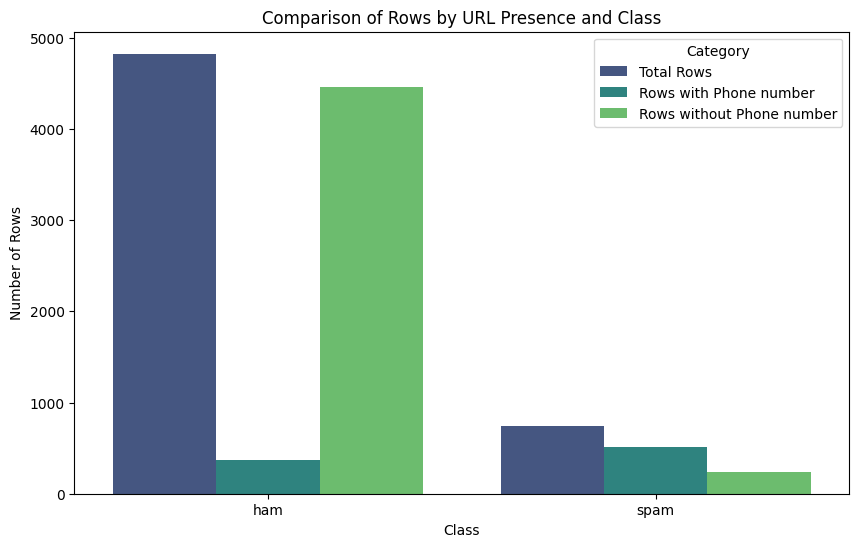

In [61]:
plot_data = pd.DataFrame({
    'Total Rows': total_rows_by_class,
    'Rows with Phone number': rows_with_phone_by_class,
    'Rows without Phone number': rows_without_phone_by_class
})

plot_data = plot_data.fillna(0)

plot_data_melted = plot_data.reset_index().melt(id_vars='v1', var_name='Category', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='v1', y='Count', hue='Category', data=plot_data_melted, palette='viridis')
plt.title('Comparison of Rows by URL Presence and Class')
plt.xlabel('Class')
plt.ylabel('Number of Rows')
plt.legend(title='Category')
plt.show()